**Dependencies**

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install opencv-python
!pip install moviepy
!pip install --upgrade moviepy

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  
from moviepy.editor import VideoFileClip
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

**CSV Training Dataset** 

In [3]:
df = pd.read_csv(r'C:\Users\T 480\MALD\MELD\train\train_sent_emo.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB
None


In [5]:
print(df.head())

   Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my companys tr...         Chandler   
1       2                   You mustve had your hands full.  The Interviewer   
2       3                            That I did. That I did.         Chandler   
3       4      So lets talk a little bit about your duties.  The Interviewer   
4       5                             My duties?  All right.         Chandler   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   neutral   neutral            0             0       8       21   
1   neutral   neutral            0             1       8       21   
2   neutral   neutral            0             2       8       21   
3   neutral   neutral            0             3       8       21   
4  surprise  positive            0             4       8       21   

      StartTime       EndTime  
0  00:16:16,059  00:16:21,731  
1  00:16:21,940  00:16:23,442  
2 

In [6]:
# Basic statistical details
print(df.describe())

             Sr No.  Dialogue_ID  Utterance_ID       Season      Episode
count   9989.000000  9989.000000    9989.00000  9989.000000  9989.000000
mean    5262.373511   526.549304       6.14516     4.853739    12.697467
std     3032.169169   302.464741       4.96027     2.389599     7.220051
min        1.000000     0.000000       0.00000     1.000000     1.000000
25%     2641.000000   261.000000       2.00000     3.000000     6.000000
50%     5267.000000   531.000000       5.00000     5.000000    12.000000
75%     7891.000000   795.000000       9.00000     7.000000    19.000000
max    10478.000000  1038.000000      23.00000     9.000000    25.000000


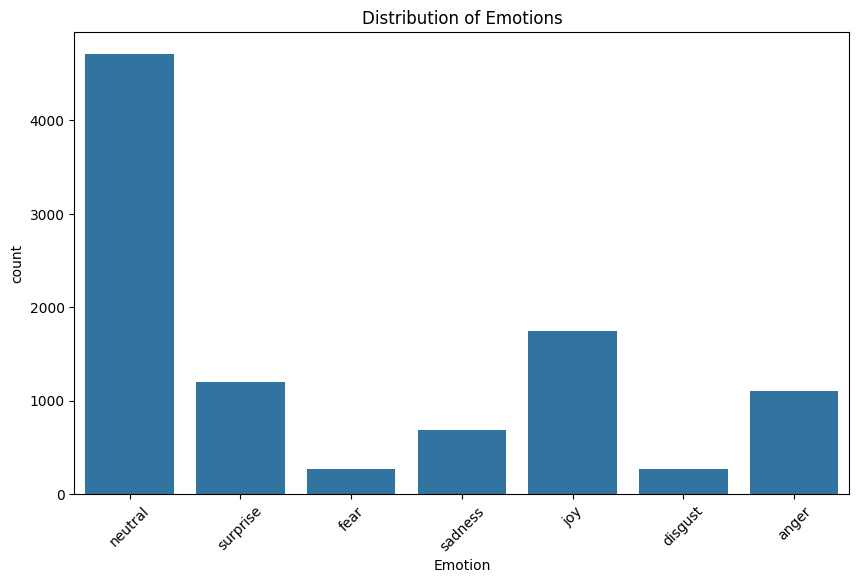

In [7]:
# Visualization of the distribution of emotions (categorical variable)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Emotion')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Check for missing values
print(df.isnull().sum())

Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64


In [9]:
# Check data types and look for any anomalies
print(df.dtypes)

Sr No.           int64
Utterance       object
Speaker         object
Emotion         object
Sentiment       object
Dialogue_ID      int64
Utterance_ID     int64
Season           int64
Episode          int64
StartTime       object
EndTime         object
dtype: object


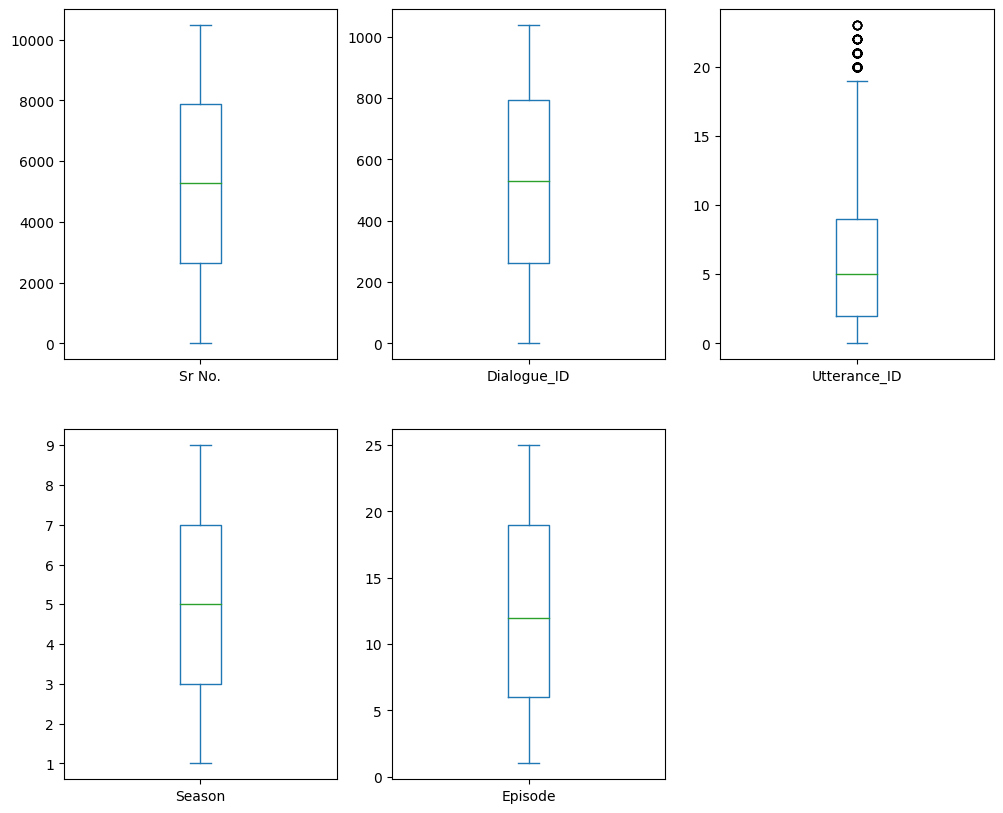

In [10]:
# Boxplot to view statistical summaries and potential outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].plot(kind='box', subplots=True, layout=(2,3), figsize=(12, 10))
plt.show()

In [11]:
df

Sr No.                                          Utterance  \
0          1  also I was the point person on my companys tr...   
1          2                   You mustve had your hands full.   
2          3                            That I did. That I did.   
3          4      So lets talk a little bit about your duties.   
4          5                             My duties?  All right.   
...      ...                                                ...   
9984   10474                                         You or me?   
9985   10475  I got it. Uh, Joey, women don't have Adam's ap...   
9986   10476               You guys are messing with me, right?   
9987   10477                                              Yeah.   
9988   10478  That was a good one. For a second there, I was...   

              Speaker   Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  \
0            Chandler   neutral   neutral            0             0       8   
1     The Interviewer   neutral   neutral            0             1       8   
2            Chandler   neutral   neutral            0             2       8   
3     The Interviewer   neutral   neutral            0             3       8   
4            Chandler  surprise  positive            0             4       8   
...               ...       ...       ...          ...           ...     ...   
9984         Chandler   neutral   neutral         1038            13       2   
9985             Ross   neutral   neutral         1038            14       2   
9986             Joey  surprise  positive         1038            15       2   
9987              All   neutral   neutral         1038            16       2   
9988             Joey       joy  positive         1038            17       2   

      Episode     StartTime       EndTime  
0          21  00:16:16,059  00:16:21,731  
1          21  00:16:21,940  00:16:23,442  
2          21  00:16:23,442  00:16:26,389  
3          21  00:16:26,820  00:16:29,572  
4          21  00:16:34,452  00:16:40,917  
...       ...           ...           ...  
9984        3  00:00:48,173  00:00:50,799  
9985        3  00:00:51,009  00:00:53,594  
9986        3  00:01:00,518  00:01:03,520  
9987        3  00:01:05,398  00:01:07,274  
9988        3  00:01:08,401  00:01:12,071  

[9989 rows x 11 columns]

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    return tokens

# Apply preprocessing to the selected range
df['Processed_Utterance'] = df['Utterance'].apply(preprocess_text)

[nltk_data] Downloading package punkt to C:\Users\T
[nltk_data]     480\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\T
[nltk_data]     480\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\T
[nltk_data]     480\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
df

Sr No.                                          Utterance  \
0          1  also I was the point person on my companys tr...   
1          2                   You mustve had your hands full.   
2          3                            That I did. That I did.   
3          4      So lets talk a little bit about your duties.   
4          5                             My duties?  All right.   
...      ...                                                ...   
9984   10474                                         You or me?   
9985   10475  I got it. Uh, Joey, women don't have Adam's ap...   
9986   10476               You guys are messing with me, right?   
9987   10477                                              Yeah.   
9988   10478  That was a good one. For a second there, I was...   

              Speaker   Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  \
0            Chandler   neutral   neutral            0             0       8   
1     The Interviewer   neutral   neutral            0             1       8   
2            Chandler   neutral   neutral            0             2       8   
3     The Interviewer   neutral   neutral            0             3       8   
4            Chandler  surprise  positive            0             4       8   
...               ...       ...       ...          ...           ...     ...   
9984         Chandler   neutral   neutral         1038            13       2   
9985             Ross   neutral   neutral         1038            14       2   
9986             Joey  surprise  positive         1038            15       2   
9987              All   neutral   neutral         1038            16       2   
9988             Joey       joy  positive         1038            17       2   

      Episode     StartTime       EndTime  \
0          21  00:16:16,059  00:16:21,731   
1          21  00:16:21,940  00:16:23,442   
2          21  00:16:23,442  00:16:26,389   
3          21  00:16:26,820  00:16:29,572   
4          21  00:16:34,452  00:16:40,917   
...       ...           ...           ...   
9984        3  00:00:48,173  00:00:50,799   
9985        3  00:00:51,009  00:00:53,594   
9986        3  00:01:00,518  00:01:03,520   
9987        3  00:01:05,398  00:01:07,274   
9988        3  00:01:08,401  00:01:12,071   

                            Processed_Utterance  
0     [also, point, person, transition, system]  
1                                  [hand, full]  
2                                            []  
3                     [talk, little, bit, duty]  
4                                 [duty, right]  
...                                         ...  
9984                                         []  
9985        [got, uh, joey, woman, adam, apple]  
9986                      [guy, messing, right]  
9987                                     [yeah]  
9988            [good, one, second, like, whoa]  

[9989 rows x 12 columns]

In [14]:
import pandas as pd

# Function to convert time to seconds
def time_to_seconds(time_str):
    h, m, s_ms = time_str.split(':')
    s, ms = s_ms.split(',')
    return int(h) * 3600 + int(m) * 60 + int(s) + int(ms) / 1000

# Calculate duration
df['StartTime_seconds'] = df['StartTime'].apply(time_to_seconds)
df['EndTime_seconds'] = df['EndTime'].apply(time_to_seconds)
df['Duration'] = df['EndTime_seconds'] - df['StartTime_seconds']

# Drop temporary columns
df = df.drop(columns=['Sr No.','Utterance','StartTime_seconds', 'EndTime_seconds'])




In [15]:
df

Speaker   Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  \
0            Chandler   neutral   neutral            0             0       8   
1     The Interviewer   neutral   neutral            0             1       8   
2            Chandler   neutral   neutral            0             2       8   
3     The Interviewer   neutral   neutral            0             3       8   
4            Chandler  surprise  positive            0             4       8   
...               ...       ...       ...          ...           ...     ...   
9984         Chandler   neutral   neutral         1038            13       2   
9985             Ross   neutral   neutral         1038            14       2   
9986             Joey  surprise  positive         1038            15       2   
9987              All   neutral   neutral         1038            16       2   
9988             Joey       joy  positive         1038            17       2   

      Episode     StartTime       EndTime  \
0          21  00:16:16,059  00:16:21,731   
1          21  00:16:21,940  00:16:23,442   
2          21  00:16:23,442  00:16:26,389   
3          21  00:16:26,820  00:16:29,572   
4          21  00:16:34,452  00:16:40,917   
...       ...           ...           ...   
9984        3  00:00:48,173  00:00:50,799   
9985        3  00:00:51,009  00:00:53,594   
9986        3  00:01:00,518  00:01:03,520   
9987        3  00:01:05,398  00:01:07,274   
9988        3  00:01:08,401  00:01:12,071   

                            Processed_Utterance  Duration  
0     [also, point, person, transition, system]     5.672  
1                                  [hand, full]     1.502  
2                                            []     2.947  
3                     [talk, little, bit, duty]     2.752  
4                                 [duty, right]     6.465  
...                                         ...       ...  
9984                                         []     2.626  
9985        [got, uh, joey, woman, adam, apple]     2.585  
9986                      [guy, messing, right]     3.002  
9987                                     [yeah]     1.876  
9988            [good, one, second, like, whoa]     3.670  

[9989 rows x 11 columns]

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming df is our complete dataframe
df['Processed_Utterance_Str'] = df['Processed_Utterance'].apply(lambda x: ' '.join(x))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Utterance_Str'], df['Emotion'], test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)




In [17]:
# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       anger       0.24      0.05      0.09       226
     disgust       0.00      0.00      0.00        55
        fear       0.00      0.00      0.00        44
         joy       0.45      0.23      0.30       332
     neutral       0.54      0.90      0.68       985
     sadness       0.35      0.06      0.11       129
    surprise       0.47      0.25      0.32       227

    accuracy                           0.52      1998
   macro avg       0.29      0.21      0.21      1998
weighted avg       0.45      0.52      0.44      1998



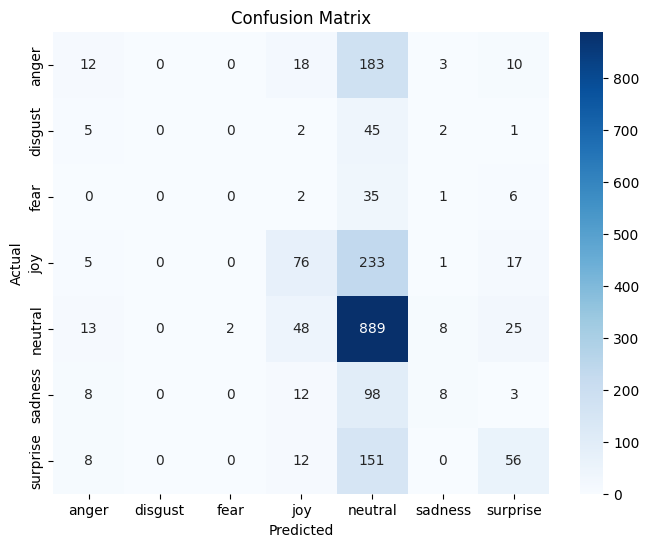

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
"""import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
# Convert processed utterances back to string format for TF-IDF
df['Processed_Utterance_Str'] = df['Processed_Utterance'].apply(lambda x: ' '.join(x))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Utterance_Str'], df['Emotion'], test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the model
model_balanced = LogisticRegression()
model_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_balanced = model_balanced.predict(X_test_tfidf)

# Evaluate the model
report_balanced = classification_report(y_test, y_pred_balanced)
print(report_balanced)

# Calculate the confusion matrix
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=model_balanced.classes_, yticklabels=model_balanced.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Balanced Data)')
plt.show()"""

"import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import classification_report, confusion_matrix\nfrom imblearn.over_sampling import SMOTE\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n# Convert processed utterances back to string format for TF-IDF\ndf['Processed_Utterance_Str'] = df['Processed_Utterance'].apply(lambda x: ' '.join(x))\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(df['Processed_Utterance_Str'], df['Emotion'], test_size=0.2, random_state=42)\n\n# Initialize TF-IDF Vectorizer\nvectorizer = TfidfVectorizer()\n\n# Fit and transform the training data\nX_train_tfidf = vectorizer.fit_transform(X_train)\n\n# Apply SMOTE to balance the dataset\nsmote = SMOTE(random_state=42)\nX_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train

In [20]:
!pip install tensorflow

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

# Convert processed utterances back to string format for tokenization
df['Processed_Utterance_Str'] = df['Processed_Utterance'].apply(lambda x: ' '.join(x))

# Encode labels
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Utterance_Str'], df['Encoded_Emotion'], test_size=0.2, random_state=42)

# Initialize Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pad, y_train)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.long)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pad, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])
        x = self.fc(x)
        return x

# Initialize model, loss function, and optimizer
vocab_size = len(tokenizer.word_index) + 1
embed_size = 100
hidden_size = 128
num_layers = 2  # Number of LSTM layers
num_classes = len(df['Encoded_Emotion'].unique())
model = LSTMModel(vocab_size, embed_size, hidden_size, num_layers, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
model.train()
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [10/408], Loss: 1.9400
Epoch [1/10], Step [20/408], Loss: 1.9395
Epoch [1/10], Step [30/408], Loss: 1.9308
Epoch [1/10], Step [40/408], Loss: 1.9586
Epoch [1/10], Step [50/408], Loss: 1.9153
Epoch [1/10], Step [60/408], Loss: 1.9385
Epoch [1/10], Step [70/408], Loss: 1.8991
Epoch [1/10], Step [80/408], Loss: 1.9205
Epoch [1/10], Step [90/408], Loss: 1.8992
Epoch [1/10], Step [100/408], Loss: 1.9256
Epoch [1/10], Step [110/408], Loss: 1.8379
Epoch [1/10], Step [120/408], Loss: 1.8851
Epoch [1/10], Step [130/408], Loss: 1.8420
Epoch [1/10], Step [140/408], Loss: 1.8826
Epoch [1/10], Step [150/408], Loss: 1.8970
Epoch [1/10], Step [160/408], Loss: 1.8889
Epoch [1/10], Step [170/408], Loss: 1.9226
Epoch [1/10], Step [180/408], Loss: 1.8542
Epoch [1/10], Step [190/408], Loss: 1.8311
Epoch [1/10], Step [200/408], Loss: 1.9306
Epoch [1/10], Step [210/408], Loss: 1.8275
Epoch [1/10], Step [220/408], Loss: 1.8762
Epoch [1/10], Step [230/408], Loss: 1.8482
Epoch [1/10], Step [

In [22]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, y_pred_classes = torch.max(y_pred, 1)
    report = classification_report(y_test_tensor, y_pred_classes)
    print(report)


              precision    recall  f1-score   support

           0       0.15      0.19      0.17       226
           1       0.05      0.16      0.07        55
           2       0.01      0.05      0.02        44
           3       0.29      0.29      0.29       332
           4       0.64      0.30      0.41       985
           5       0.11      0.16      0.13       129
           6       0.24      0.41      0.30       227

    accuracy                           0.28      1998
   macro avg       0.21      0.22      0.20      1998
weighted avg       0.42      0.28      0.31      1998



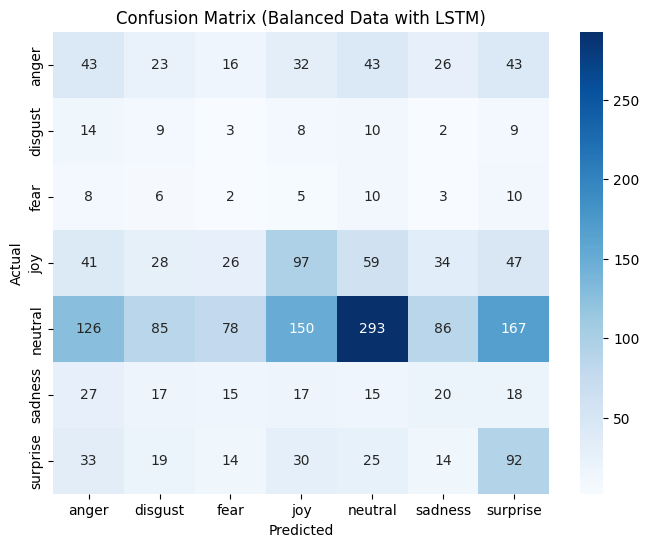

In [23]:
cm = confusion_matrix(y_test_tensor, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Balanced Data with LSTM)')
plt.show()

In [24]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_train_tensor)
    _, y_pred_classes = torch.max(y_pred, 1)
    report = classification_report(y_train_tensor, y_pred_classes)
    print(report)


              precision    recall  f1-score   support

           0       0.90      0.82      0.86      3725
           1       0.94      0.90      0.92      3725
           2       0.92      0.82      0.87      3725
           3       0.84      0.84      0.84      3725
           4       0.82      0.79      0.81      3725
           5       0.94      0.87      0.90      3725
           6       0.67      0.90      0.76      3725

    accuracy                           0.85     26075
   macro avg       0.86      0.85      0.85     26075
weighted avg       0.86      0.85      0.85     26075



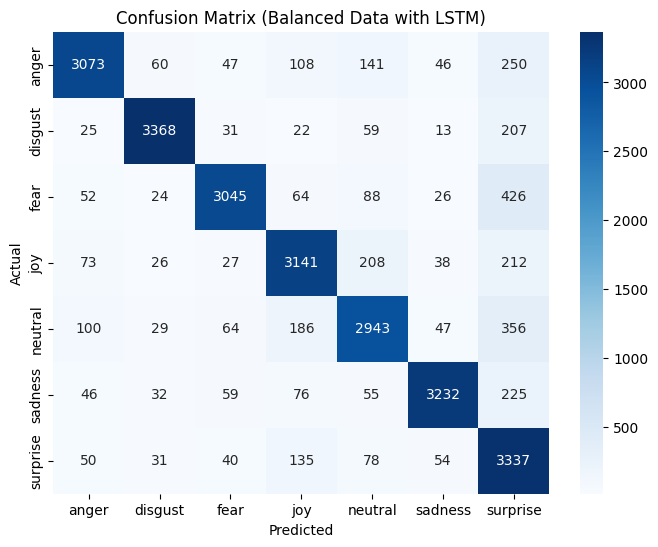

In [25]:
cm = confusion_matrix(y_train_tensor, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Balanced Data with LSTM)')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
from sklearn.model_selection import ParameterGrid
import random

# Convert processed utterances back to string format for tokenization
df['Processed_Utterance_Str'] = df['Processed_Utterance'].apply(lambda x: ' '.join(x))

# Encode labels
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Utterance_Str'], df['Encoded_Emotion'], test_size=0.2, random_state=42)

# Initialize Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pad, y_train)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.long)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pad, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])
        x = self.fc(x)
        return x

# Define the hyperparameter grid
param_grid = {
    'embed_size': [50, 100, 200],
    'hidden_size': [64, 128, 256],
    'num_layers': [1, 2, 3],
    'dropout': [0.2, 0.3, 0.5],
    'learning_rate': [0.001, 0.005, 0.01],
    'batch_size': [32, 64, 128]
}

# Generate all combinations of hyperparameters
param_combinations = list(ParameterGrid(param_grid))

best_params = None
best_accuracy = 0

for params in param_combinations:
    # Update model and optimizer with new parameters
    model = LSTMModel(vocab_size, params['embed_size'], params['hidden_size'], params['num_layers'], num_classes)
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

    # DataLoader with new batch size
    train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        for i, (inputs, labels) in enumerate(train_loader):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model on the test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    print(f'Params: {params}, Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f'Best params: {best_params}, Best accuracy: {best_accuracy:.4f}')


Params: {'batch_size': 32, 'dropout': 0.2, 'embed_size': 50, 'hidden_size': 64, 'learning_rate': 0.001, 'num_layers': 1}, Accuracy: 0.2883
Params: {'batch_size': 32, 'dropout': 0.2, 'embed_size': 50, 'hidden_size': 64, 'learning_rate': 0.001, 'num_layers': 2}, Accuracy: 0.2803
Params: {'batch_size': 32, 'dropout': 0.2, 'embed_size': 50, 'hidden_size': 64, 'learning_rate': 0.001, 'num_layers': 3}, Accuracy: 0.2598
Params: {'batch_size': 32, 'dropout': 0.2, 'embed_size': 50, 'hidden_size': 64, 'learning_rate': 0.005, 'num_layers': 1}, Accuracy: 0.2688
Params: {'batch_size': 32, 'dropout': 0.2, 'embed_size': 50, 'hidden_size': 64, 'learning_rate': 0.005, 'num_layers': 2}, Accuracy: 0.2618
Params: {'batch_size': 32, 'dropout': 0.2, 'embed_size': 50, 'hidden_size': 64, 'learning_rate': 0.005, 'num_layers': 3}, Accuracy: 0.2793
Params: {'batch_size': 32, 'dropout': 0.2, 'embed_size': 50, 'hidden_size': 64, 'learning_rate': 0.01, 'num_layers': 1}, Accuracy: 0.2548
Params: {'batch_size': 32, '